In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['text.usetex'] = True

df = pd.read_csv("~/Dropbox/data_hdqi/gibbs_data_big_n.csv")
df["r"] = df["e"] / df["m"] # ratio
print(df)

         n      m  k   e   t         r
0     1000  10000  3  63  10  0.006300
1     1000  10000  3  64  11  0.006400
2     1000  10000  3  61  12  0.006100
3     1000  10000  3  63  13  0.006300
4     1000  10000  3  64  14  0.006400
...    ...    ... ..  ..  ..       ...
8995   800   8000  6  59   5  0.007375
8996   800   8000  6  58   6  0.007250
8997   800   8000  6  59   7  0.007375
8998   800   8000  6  59   8  0.007375
8999   800   8000  6  59   9  0.007375

[9000 rows x 6 columns]


In [44]:
# Group by (n, m, k) and aggregate
summary = (
    df.groupby(["n", "m", "k"])
      .agg(
          avg_r=("r", "mean"),
          std_r=("r", "std"),
          num_trials=("r", "count")
      )
      .reset_index()
)

summary['R'] = (summary['m'] / summary['n']).astype(int)


print(summary)

        n      m  k     avg_r     std_r  num_trials   R
0     200    600  3  0.034767  0.001429          50   3
1     200    600  4  0.036133  0.001188          50   3
2     200    600  5  0.034033  0.001015          50   3
3     200    600  6  0.030300  0.001199          50   3
4     200   1200  3  0.011967  0.000469          50   6
..    ...    ... ..       ...       ...         ...  ..
175  3000  18000  6  0.014630  0.000072          50   6
176  3000  30000  3  0.006482  0.000042          50  10
177  3000  30000  4  0.007881  0.000033          50  10
178  3000  30000  5  0.007987  0.000034          50  10
179  3000  30000  6  0.007706  0.000027          50  10

[180 rows x 7 columns]


3


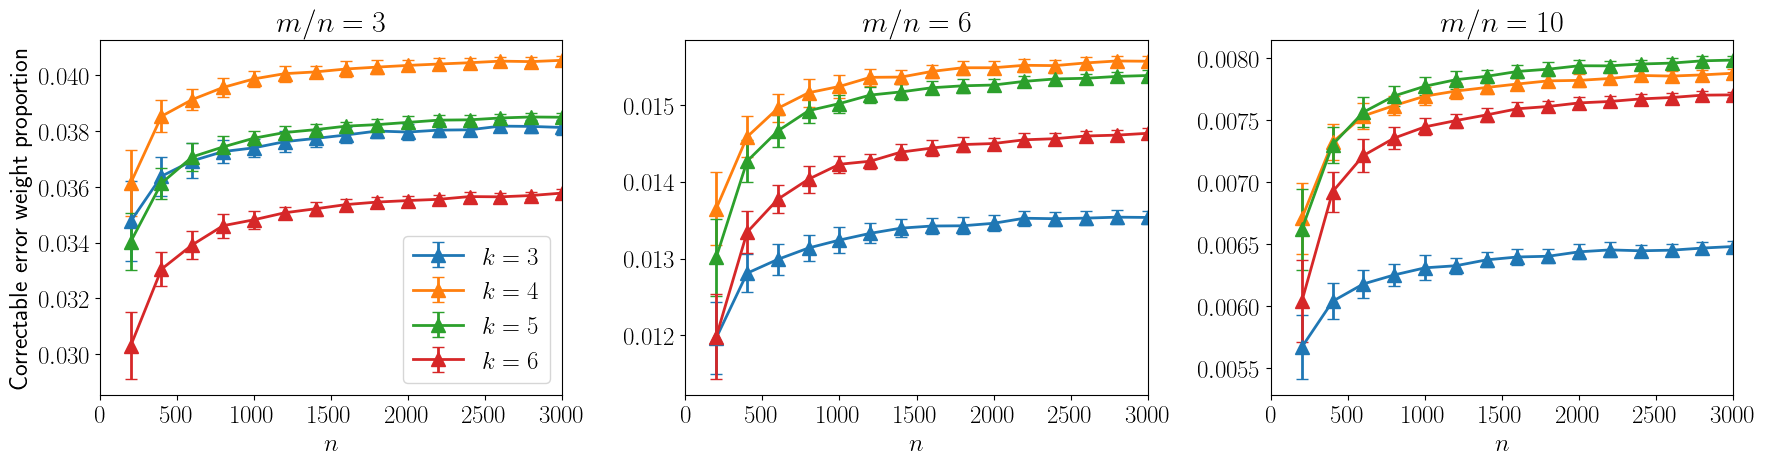

In [54]:
R_values = sorted(summary["R"].unique())
num_R = len(R_values)
print(num_R)

# Create subplots horizontally
fig, axes = plt.subplots(1, num_R, figsize=(6*num_R, 5), sharey=False)

# Color map for different k values
colors = plt.cm.tab10.colors  # up to 10 distinct colors

# Font size
plt.rc("font", size=18)

for idx, R_val in enumerate(R_values):
    ax = axes[idx]

    # Subset for this m
    df_R = summary[summary["R"] == R_val]

    # One curve for each k
    for j, k_val in enumerate(sorted(df_R["k"].unique())):
        df_Rk = df_R[df_R["k"] == k_val].sort_values("n")

        ax.errorbar(
            df_Rk["n"], df_Rk["avg_r"],
            yerr=df_Rk["std_r"],
            fmt='-^',  # line with triangle markers
            markersize=10,
            linewidth=2,
            capsize=4,
            color=colors[j % len(colors)],
            label=fr"$k = {k_val}$" if idx == 0 else None  # legend only on right-most plot
        )

    ax.set_title(fr"$m/n = {R_val}$")
    ax.set_xlabel(r"$n$")
    if idx == 0:
        ax.set_ylabel("Correctable error weight proportion")

    # Explicit x-axis setup
    ax.set_xlim(0, 3000)
    ax.set_xticks(np.arange(0, 3001, 500))

# Legend only on right-most plot
axes[0].legend()

plt.tight_layout()
plt.show()

In [52]:
# Get results about the semicircle law
semicircle_law = lambda r: (np.sqrt(r) + np.sqrt(1-r))**2 / 2

# --- Step 1: Apply f(e, m) row by row ---
df["semicircle"] = df.apply(lambda row: semicircle_law(row["r"]), axis=1)

# --- Step 2: Group by (n, m, k) and compute mean/std of semicircle ---
semicircle_summary = (
    df.groupby(["n", "m", "k"])
      .agg(
          avg_semi=("semicircle", "mean"),
          std_semi=("semicircle", "std"),
          num_trials=("semicircle", "count")
      )
      .reset_index()
)

# --- Step 3: (optional) print counts like before ---
semi_focused = semicircle_summary[semicircle_summary["n"] == 1200]
semi_focused['R'] = semi_focused['m'] // semi_focused['n']
print(semi_focused)

       n      m  k  avg_semi  std_semi  num_trials   R
60  1200   3600  3  0.690278  0.000905          50   3
61  1200   3600  4  0.696101  0.000676          50   3
62  1200   3600  5  0.691074  0.000591          50   3
63  1200   3600  6  0.683961  0.000564          50   3
64  1200   7200  3  0.614673  0.000545          50   6
65  1200   7200  4  0.622973  0.000430          50   6
66  1200   7200  5  0.622060  0.000400          50   6
67  1200   7200  6  0.618587  0.000399          50   6
68  1200  12000  3  0.579287  0.000403          50  10
69  1200  12000  4  0.587617  0.000358          50  10
70  1200  12000  5  0.588130  0.000414          50  10
71  1200  12000  6  0.586267  0.000326          50  10


/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/30807581.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_focused['R'] = semi_focused['m'] // semi_focused['n']


In [53]:
semi_focused['avg_semi'] *= 100
semi_focused['std_semi'] *= 100
semi_focused['avg_semi'] = round(semi_focused['avg_semi'], 2)
semi_focused['std_semi'] = round(semi_focused['std_semi'], 2)
print(semi_focused)

       n      m  k  avg_semi  std_semi  num_trials   R
60  1200   3600  3     69.03      0.09          50   3
61  1200   3600  4     69.61      0.07          50   3
62  1200   3600  5     69.11      0.06          50   3
63  1200   3600  6     68.40      0.06          50   3
64  1200   7200  3     61.47      0.05          50   6
65  1200   7200  4     62.30      0.04          50   6
66  1200   7200  5     62.21      0.04          50   6
67  1200   7200  6     61.86      0.04          50   6
68  1200  12000  3     57.93      0.04          50  10
69  1200  12000  4     58.76      0.04          50  10
70  1200  12000  5     58.81      0.04          50  10
71  1200  12000  6     58.63      0.03          50  10


/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/2119754244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_focused['avg_semi'] *= 100
/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/2119754244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_focused['std_semi'] *= 100
/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/2119754244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row